In [2]:
import pandas as pd

df = pd.read_csv('ryong_comments_update.csv')

# 한 줄로 다 합치기
text = ' '.join(df.iloc[:, 0].astype(str).tolist())
print(text[:100])

? ? ? ?: 먼훗날에 다시 돌아오겠습니다 ? 이거 제목 바꾼거임?<br>원래 버섯 섬 뭐시기 였던 것 같은데 ? 재업인가? ?? ??: 도둑의 바다보다 조회수가 안나오는 게임.


In [3]:
from bs4 import BeautifulSoup

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [4]:
from emoji import core
import re

def remove_emojis(string) :
    text = core.replace_emoji(string)
    text = re.sub(r'\[.*?\]', '', text)
    return text

In [5]:
tag_removed_text = remove_html_tags(text)
print(tag_removed_text[:100])
emoji_removed_text = remove_emojis(tag_removed_text)
print(emoji_removed_text[:100])

? ? ? ?: 먼훗날에 다시 돌아오겠습니다 ? 이거 제목 바꾼거임?원래 버섯 섬 뭐시기 였던 것 같은데 ? 재업인가? ?? ??: 도둑의 바다보다 조회수가 안나오는 게임...다시
? ? ? ?: 먼훗날에 다시 돌아오겠습니다 ? 이거 제목 바꾼거임?원래 버섯 섬 뭐시기 였던 것 같은데 ? 재업인가? ?? ??: 도둑의 바다보다 조회수가 안나오는 게임...다시


In [6]:
def remove_special_chars(text):
    return re.sub(r'[ㄱ-ㅎㅏ-ㅣ]+', '', text)

clean_text = remove_special_chars(emoji_removed_text)
print(clean_text[:500])

? ? ? ?: 먼훗날에 다시 돌아오겠습니다 ? 이거 제목 바꾼거임?원래 버섯 섬 뭐시기 였던 것 같은데 ? 재업인가? ?? ??: 도둑의 바다보다 조회수가 안나오는 게임...다시는 하지 말아야겠군. ??? : 뭔가 파피플레이 타임은 처음 화면이 안무서워서 뭔가 더 매력적인거 같아. 아니 개징그럽잔하; ???: 얘들을 구해야해! ???:아 네 공룡이 어머님^^ 아 다름이 아니라 공룡이가 가전제품을 샀데요  아 네 ^^ ??이게 무슨일이람 공룡 영상..? 공룡영상이 또 이렇게 빠르게 업로드된다니.. 공룡님 정말로 4월달은 힘내시는군요 와!!!너무 좋아 ¿모음집 인가? . ..? ..유크타에서 공룡님을 젤 좋아했는데 공룡님이 젤 먼저 죽어서 슬퍼하고 있다가,공룡님이라면 이걸 제작해서 먼저 죽었을수도 있겠다고 생각했는데 마지막에 공룡님도 제작 참여하신거 보고 비하인드 올리시겠네라고 생각하고 있었는데 다행이네요 ‘몰래’가 곧 ‘알게 된’으로 바뀔 시간이 얼마 남지 않았습니다 ” 피카소가 뺨


In [7]:
from konlpy.tag import Okt
t = Okt()

pos_tags = t.pos(clean_text)
tokens_comments = [word for word, pos in pos_tags if pos in ['Noun', 'Adjective']]

print(tokens_comments[:100])


['먼훗날', '다시', '거', '제목', '임', '원래', '버섯', '섬', '뭐시기', '것', '같은데', '재업', '도둑', '바다', '조회', '수가', '게임', '뭔가', '파', '피플', '레이', '타임', '처음', '화면', '무서워서', '뭔가', '더', '매력', '같아', '아니', '개', '징그럽', '얘', '구', '네', '공룡', '어머님', '다름이', '아니라', '공룡', '가전제품', '네', '이', '람', '공룡', '영상', '공룡', '영상', '또', '빠르게', '업로드', '공룡', '좋아', '모음', '집', '유', '타', '공룡', '젤', '좋아했는데', '공룡', '젤', '먼저', '슬퍼하고', '있다가', '공룡', '라면', '걸', '제작', '먼저', '있겠다고', '생각', '마지막', '공룡', '제작', '참여', '보고', '비하인드', '생각', '있었는데', '다행', '요', '몰래', '곧', '알', '시간', '얼마', '남지', '피카소', '뺨칠', '그림실력', '어린이', '용', '게임', '공룡', '일', '왕관', '쓰려는자', '그', '무게']


In [26]:
tokens_comments = [token for token in tokens_comments if len(token) > 1]

print(tokens_comments[:100])

['먼훗날', '다시', '제목', '원래', '버섯', '뭐시기', '같은데', '재업', '도둑', '바다', '조회', '수가', '게임', '뭔가', '피플', '레이', '타임', '처음', '화면', '무서워서', '뭔가', '매력', '같아', '아니', '징그럽', '공룡', '어머님', '다름이', '아니라', '공룡', '가전제품', '공룡', '영상', '공룡', '영상', '빠르게', '업로드', '공룡', '좋아', '모음', '공룡', '좋아했는데', '공룡', '먼저', '슬퍼하고', '있다가', '공룡', '라면', '제작', '먼저', '있겠다고', '생각', '마지막', '공룡', '제작', '참여', '보고', '비하인드', '생각', '있었는데', '다행', '몰래', '시간', '얼마', '남지', '피카소', '뺨칠', '그림실력', '어린이', '게임', '공룡', '왕관', '쓰려는자', '무게', '동호', '이제', '무게', '코마', '기억', '입니다', '전멸', '모든', '영상', '멸망한', '직권', '전쟁', '저작권', '때문', '멸망한', '동영상', '다시', '조심', '우리나라', '사고뭉치', '왕자', '망국', '왕자', '호의', '왕국', '멸망할']


In [25]:
comments_cnt = {}
for word in tokens_comments:
    comments_cnt[word] = comments_cnt.get(word, 0) + 1

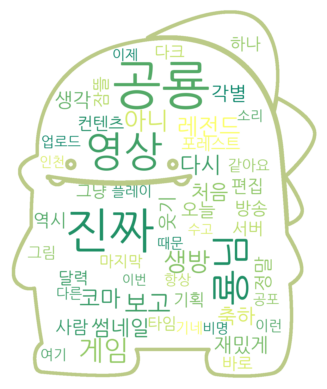

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

ryong_mask = np.array(Image.open("ryong_vector.png"))

plt.rc('font', family='NanumGothic')

font_path = "./NanumGothic.ttf"

wordcloud = WordCloud(
    font_path=font_path,
    max_font_size=200,
    min_font_size=50,
    mask=ryong_mask,
    width=800,
    height=400,
    contour_width=25,
    contour_color='#BBCA87',
    background_color='white',
    colormap="summer",
    max_words=100
)

wordcloud.generate_from_frequencies(comments_cnt)

wordcloud.to_file('ryong_with_mask.png')

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

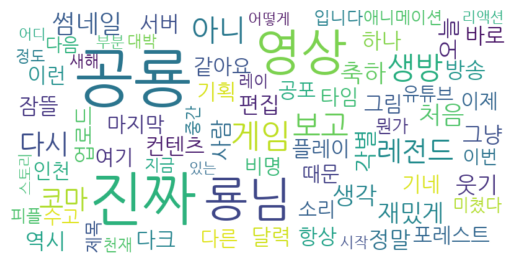

In [28]:
wordcloud = WordCloud(
    font_path=font_path,
    max_font_size=100,
    width=800,
    height=400,
    background_color='white',
    max_words=75
)

wordcloud.generate_from_frequencies(comments_cnt)

wordcloud.to_file('const.png')

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()